In [2]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from dataclasses import dataclass, field, asdict
import argparse

from main import Parameter
from run_AOUP import AOUP

In [7]:
slope, Lambda, velocity = 0.5, 0.5, 0.1
temperature = 0.02

parameter = Parameter(
    N_particle = 1000000,
    N_ensemble = 1,
    velocity = velocity,
    slope = slope,
    Lambda = Lambda,
    boundary = 5.0,
    N_bins = 100,
    gamma = 1.0,
    temperature = temperature,
    tau = 1.0,
    Da = 1.0,
    delta_t = 0.001,
    initial = 10000,
    sampling = 100,
    interval = 100,
    degree = 4,
)

print(parameter)

Parameter(N_particle=100000, N_ensemble=1, velocity=0.1, Lambda=0.5, boundary=5.0, N_bins=100, gamma=1.0, slope=0.5, temperature=0.02, tau=1.0, Da=1.0, delta_t=0.001, initial=10000, sampling=100, interval=100, degree=4)


In [8]:
aoup = AOUP(parameter)
frames = 1000

In [9]:
# aoup.average_distribution(frames=frames)

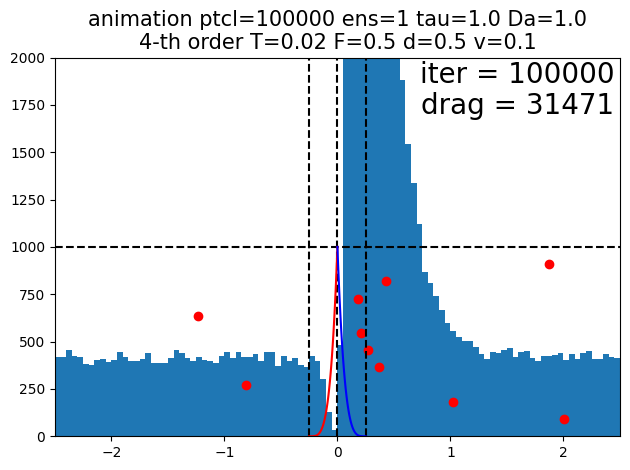

In [10]:
aoup.animate_histogram(frames=frames, interval=100, fps=30)


In [6]:
# aoup.phase_space(frames=frames)